In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
sales=pd.read_excel('superstore_sales.xlsx')
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [3]:
sales[sales.customer_name.duplicated()]


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.6700,5,0.10,37.7700,4.700,Medium,2011
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.2420,2,0.10,15.3420,1.800,Medium,2011
11,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Furniture,Tables,"Chromcraft Round Table, Adjustable Height",211.1805,1,0.55,-70.3995,21.320,High,2011
14,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Furniture,Chairs,"Hon Rocking Chair, Set of Two",159.4440,2,0.40,-95.6760,10.070,Low,2011
17,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Accessories,"Belkin Numeric Keypad, Bluetooth",69.3000,2,0.40,3.4200,8.340,Low,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.9040,2,0.20,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.9900,1,0.00,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.4000,3,0.00,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.1200,1,0.00,0.5600,0.199,Medium,2014


In [4]:
sales.count()

order_id          51290
order_date        51290
ship_date         51290
ship_mode         51290
customer_name     51290
segment           51290
state             51290
country           51290
market            51290
region            51290
product_id        51290
category          51290
sub_category      51290
product_name      51290
sales             51290
quantity          51290
discount          51290
profit            51290
shipping_cost     51290
order_priority    51290
year              51290
dtype: int64

In [5]:
total_sales=sales.groupby('year').sum().reset_index()
total_sales

,year,sales,quantity,discount,profit,shipping_cost
0,2011,2.259451e+06,31443,1333.394,248940.81154,244270.34550
1,2012,2.677439e+06,38111,1548.774,307415.27910,283490.82400
2,2013,3.405746e+06,48136,1935.522,408512.76018,364548.74436
3,2014,4.299866e+06,60622,2512.038,504165.97046,460505.78954


#### GRAPH FOR TREND

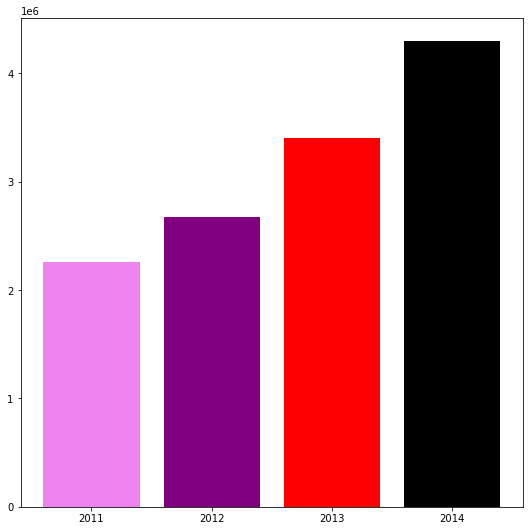

In [6]:
total_sales
plt.figure(figsize=(9,9))
plt.bar(total_sales['year'],total_sales['sales'],color=['violet','purple','r','black'])
plt.xticks(total_sales['year'])
plt.show()

In [7]:
sales.columns
sales.sort_values(by=['sales'],ascending=False)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
1103,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,Sean Miller,Home Office,Florida,United States,US,South,...,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,24.28650,Medium,2011
29530,CA-2013-118689,2013-10-03,2013-10-10,Standard Class,Tamara Chand,Corporate,Indiana,United States,US,Central,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,349.07000,Medium,2013
36239,CA-2014-140151,2014-03-24,2014-03-26,First Class,Raymond Buch,Consumer,Washington,United States,US,West,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,20.00054,Medium,2014
46525,CA-2014-127180,2014-10-23,2014-10-25,First Class,Tom Ashbrook,Home Office,New York,United States,US,East,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,45.98000,High,2014
48097,CA-2014-166709,2014-11-18,2014-11-23,Standard Class,Hunter Lopez,Consumer,Delaware,United States,US,East,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,363.19000,Medium,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,US-2011-152723,2011-09-26,2011-09-26,Same Day,Henry Goldwyn,Corporate,Texas,United States,US,Central,...,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,0.8,-1.4016,0.09000,High,2011
1349,CA-2011-112403,2011-03-31,2011-03-31,Same Day,Jas O'Carroll,Consumer,Pennsylvania,United States,US,East,...,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,0.7,-0.5964,0.10000,High,2011
25006,CA-2013-168361,2013-06-22,2013-06-26,Standard Class,Ken Brennan,Corporate,Illinois,United States,US,Central,...,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,0.8,-1.3376,0.06000,Medium,2013
35491,CA-2014-124114,2014-03-03,2014-03-03,Same Day,Roland Schwarz,Corporate,Texas,United States,US,Central,...,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,0.8,-0.9452,0.08000,Medium,2014


In [8]:
sales[sales['order_id'].duplicated()]
sales[sales['customer_name']=='Larry Blacks']

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
10,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Office Supplies,Storage,"Tenex Lockers, Industrial",337.6395,3,0.45,-122.8005,33.750,High,2011
11,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Furniture,Tables,"Chromcraft Round Table, Adjustable Height",211.1805,1,0.55,-70.3995,21.320,High,2011
25,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Office Supplies,Fasteners,"Stockwell Staples, Metal",6.0060,1,0.45,0.5460,0.800,High,2011
1334,ES-2011-3721082,2011-03-31,2011-04-04,Standard Class,Larry Blacks,Consumer,Geneva,Switzerland,EU,Central,...,Furniture,Furnishings,"Eldon Clock, Erganomic",110.2800,2,0.00,37.4400,5.630,Medium,2011
1343,ES-2011-3721082,2011-03-31,2011-04-04,Standard Class,Larry Blacks,Consumer,Geneva,Switzerland,EU,Central,...,Office Supplies,Art,"Stanley Pens, Easy-Erase",20.6400,2,0.00,9.0600,1.030,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48104,MX-2014-143161,2014-11-18,2014-11-22,Standard Class,Larry Blacks,Consumer,San Salvador,El Salvador,LATAM,Central,...,Office Supplies,Appliances,"Hamilton Beach Microwave, Red",1318.3800,7,0.00,382.2000,107.492,Medium,2014
48157,MX-2014-143161,2014-11-18,2014-11-22,Standard Class,Larry Blacks,Consumer,San Salvador,El Salvador,LATAM,Central,...,Furniture,Chairs,"Office Star Swivel Stool, Red",347.8800,3,0.00,97.3800,12.686,Medium,2014
48178,MX-2014-143161,2014-11-18,2014-11-22,Standard Class,Larry Blacks,Consumer,San Salvador,El Salvador,LATAM,Central,...,Office Supplies,Paper,"Xerox Memo Slips, Premium",81.1800,9,0.00,38.8800,5.551,Medium,2014
48205,MX-2014-143161,2014-11-18,2014-11-22,Standard Class,Larry Blacks,Consumer,San Salvador,El Salvador,LATAM,Central,...,Furniture,Furnishings,"Deflect-O Photo Frame, Erganomic",67.3600,2,0.00,33.0000,1.720,Medium,2014


In [9]:
sales.columns
new_sales=sales[['order_id','order_date','ship_mode','customer_name','country','product_name','order_priority']]
new_sales[new_sales['order_id'].duplicated()]

,order_id,order_date,ship_mode,customer_name,country,product_name,order_priority
4,IN-2011-47883,2011-01-01,Standard Class,Joseph Holt,Australia,"Eldon Light Bulb, Duo Pack",Medium
5,IN-2011-47883,2011-01-01,Standard Class,Joseph Holt,Australia,"Eaton Computer Printout Paper, 8.5 x 11",Medium
11,IN-2011-65159,2011-01-03,Second Class,Larry Blacks,Philippines,"Chromcraft Round Table, Adjustable Height",High
14,ID-2011-80230,2011-01-03,Standard Class,Ken Lonsdale,New Zealand,"Hon Rocking Chair, Set of Two",Low
17,ID-2011-80230,2011-01-03,Standard Class,Ken Lonsdale,New Zealand,"Belkin Numeric Keypad, Bluetooth",Low
...,...,...,...,...,...,...,...
51277,MX-2014-141712,2014-12-31,Same Day,Rick Bensley,Nicaragua,"Smead Box, Industrial",Critical
51283,IN-2014-23754,2014-12-31,Standard Class,Kalyca Meade,China,"Eaton Note Cards, 8.5 x 11",Medium
51285,CA-2014-115427,2014-12-31,Standard Class,Erica Bern,United States,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",Medium
51287,MX-2014-110527,2014-12-31,Second Class,Charlotte Melton,Nicaragua,"Hon Color Coded Labels, 5000 Label Set",Medium


In [10]:
dupli=new_sales
dupli['Products']=dupli.groupby('order_id')['product_name'].transform(lambda x:','.join(x))


<ipython-input-10-fea336c11c5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli['Products']=dupli.groupby('order_id')['product_name'].transform(lambda x:','.join(x))


In [11]:
dupli[dupli['order_id'].duplicated()]['Products'].head(10)

4     Acme Trimmer, High Speed,Eldon Light Bulb, Duo...
5     Acme Trimmer, High Speed,Eldon Light Bulb, Duo...
11    Tenex Lockers, Industrial,Chromcraft Round Tab...
14    Hewlett Wireless Fax, Laser,Hon Rocking Chair,...
17    Hewlett Wireless Fax, Laser,Hon Rocking Chair,...
18    Hewlett Wireless Fax, Laser,Hon Rocking Chair,...
20    Hoover Microwave, White,Avery Color Coded Labe...
22    Breville Coffee Grinder, Black,Rogers Folders,...
24    Novimex Swivel Stool, Set of Two,Cameo Interof...
25    Tenex Lockers, Industrial,Chromcraft Round Tab...
Name: Products, dtype: object

In [12]:
dupli.head()
dupli.drop_duplicates(subset=['order_id'],keep='first',inplace=True)
dupli.count()

<ipython-input-12-ec6e69995de3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli.drop_duplicates(subset=['order_id'],keep='first',inplace=True)


order_id          25035
order_date        25035
ship_mode         25035
customer_name     25035
country           25035
product_name      25035
order_priority    25035
Products          25035
dtype: int64

In [13]:
sales[sales['order_id'].duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.6700,5,0.10,37.7700,4.700,Medium,2011
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.2420,2,0.10,15.3420,1.800,Medium,2011
11,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Furniture,Tables,"Chromcraft Round Table, Adjustable Height",211.1805,1,0.55,-70.3995,21.320,High,2011
14,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Furniture,Chairs,"Hon Rocking Chair, Set of Two",159.4440,2,0.40,-95.6760,10.070,Low,2011
17,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Accessories,"Belkin Numeric Keypad, Bluetooth",69.3000,2,0.40,3.4200,8.340,Low,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,MX-2014-141712,2014-12-31,2014-12-31,Same Day,Rick Bensley,Home Office,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Storage,"Smead Box, Industrial",15.0000,2,0.00,1.2000,2.338,Critical,2014
51283,IN-2014-23754,2014-12-31,2015-01-07,Standard Class,Kalyca Meade,Corporate,Guangdong,China,APAC,North Asia,...,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.4700,3,0.00,25.3800,1.410,Medium,2014
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.9040,2,0.20,4.5188,0.890,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.4000,3,0.00,12.3600,0.350,Medium,2014


In [14]:
dupli.head(20)

,order_id,order_date,ship_mode,customer_name,country,product_name,order_priority,Products
0,AG-2011-2040,2011-01-01,Standard Class,Toby Braunhardt,Algeria,"Tenex Lockers, Blue",Medium,"Tenex Lockers, Blue"
1,IN-2011-47883,2011-01-01,Standard Class,Joseph Holt,Australia,"Acme Trimmer, High Speed",Medium,"Acme Trimmer, High Speed,Eldon Light Bulb, Duo..."
2,HU-2011-1220,2011-01-01,Second Class,Annie Thurman,Hungary,"Tenex Box, Single Width",High,"Tenex Box, Single Width"
3,IT-2011-3647632,2011-01-01,Second Class,Eugene Moren,Sweden,"Enermax Note Cards, Premium",High,"Enermax Note Cards, Premium"
6,CA-2011-1510,2011-01-02,Standard Class,Magdelene Morse,Canada,"Okidata Inkjet, Wireless",Medium,"Okidata Inkjet, Wireless"
7,IN-2011-79397,2011-01-03,Same Day,Kean Nguyen,Australia,"Hoover Microwave, White",Critical,"Hoover Microwave, White,Avery Color Coded Labe..."
8,ID-2011-80230,2011-01-03,Standard Class,Ken Lonsdale,New Zealand,"Hewlett Wireless Fax, Laser",Low,"Hewlett Wireless Fax, Laser,Hon Rocking Chair,..."
9,IZ-2011-4680,2011-01-03,Standard Class,Lindsay Williams,Iraq,"Novimex Swivel Stool, Set of Two",High,"Novimex Swivel Stool, Set of Two,Cameo Interof..."
10,IN-2011-65159,2011-01-03,Second Class,Larry Blacks,Philippines,"Tenex Lockers, Industrial",High,"Tenex Lockers, Industrial,Chromcraft Round Tab..."
12,ES-2011-4869686,2011-01-03,Standard Class,Dorothy Dickinson,United Kingdom,"Dania Corner Shelving, Traditional",Medium,"Dania Corner Shelving, Traditional"


In [15]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [16]:
sales2=sales
sales2.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [17]:

def new(prod):
    return prod.split(',')[-1]

sales2['New_product']=sales['product_name'].apply(lambda x:new(x))
sales2.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,New_product
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,Blue
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,High Speed
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,Single Width
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,Premium
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,Duo Pack


In [18]:
sales2['Product']=sales['product_name'].str.split(',',expand=True)[0]

In [19]:
sales2.drop(columns=['product_name'],inplace=True)

In [20]:
sales2.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority,year,New_product,Product
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,408.300,2,0.0,106.140,35.46,Medium,2011,Blue,Tenex Lockers
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,120.366,3,0.1,36.036,9.72,Medium,2011,High Speed,Acme Trimmer
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,66.120,4,0.0,29.640,8.17,High,2011,Single Width,Tenex Box
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,44.865,3,0.5,-26.055,4.82,High,2011,Premium,Enermax Note Cards
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,113.670,5,0.1,37.770,4.70,Medium,2011,Duo Pack,Eldon Light Bulb


In [21]:
sales2.columns
sales2=sales2[['order_id', 'order_date',  'country','Product']]
sales2['all_products']=sales2.groupby(['order_id','order_date'])['Product'].transform(lambda x:','.join(x))
sales2

<ipython-input-21-bc819f5152b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2['all_products']=sales2.groupby(['order_id','order_date'])['Product'].transform(lambda x:','.join(x))


,order_id,order_date,country,Product,all_products
0,AG-2011-2040,2011-01-01,Algeria,Tenex Lockers,Tenex Lockers
1,IN-2011-47883,2011-01-01,Australia,Acme Trimmer,"Acme Trimmer,Eldon Light Bulb,Eaton Computer P..."
2,HU-2011-1220,2011-01-01,Hungary,Tenex Box,Tenex Box
3,IT-2011-3647632,2011-01-01,Sweden,Enermax Note Cards,Enermax Note Cards
4,IN-2011-47883,2011-01-01,Australia,Eldon Light Bulb,"Acme Trimmer,Eldon Light Bulb,Eaton Computer P..."
...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,United States,Cardinal Slant-D Ring Binder,"GBC Binding covers,Cardinal Slant-D Ring Binder"
51286,MO-2014-2560,2014-12-31,Morocco,Wilson Jones Hole Reinforcements,Wilson Jones Hole Reinforcements
51287,MX-2014-110527,2014-12-31,Nicaragua,Hon Color Coded Labels,"Nokia Office Telephone,Kleencut Ruler,Hon Colo..."
51288,MX-2014-114783,2014-12-31,Mexico,Hon Legal Exhibit Labels,"Fellowes Folders,Hon Legal Exhibit Labels"


In [22]:
sales2.drop(columns='Product',inplace=True)

C:\Users\Subramaniam\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
sales2.head()

,order_id,order_date,country,all_products
0,AG-2011-2040,2011-01-01,Algeria,Tenex Lockers
1,IN-2011-47883,2011-01-01,Australia,"Acme Trimmer,Eldon Light Bulb,Eaton Computer P..."
2,HU-2011-1220,2011-01-01,Hungary,Tenex Box
3,IT-2011-3647632,2011-01-01,Sweden,Enermax Note Cards
4,IN-2011-47883,2011-01-01,Australia,"Acme Trimmer,Eldon Light Bulb,Eaton Computer P..."


In [24]:
sales2.drop_duplicates(keep='first',inplace=True)

<ipython-input-24-c6adab01f785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2.drop_duplicates(keep='first',inplace=True)


In [25]:
sales2[sales2.duplicated('order_id')]

,order_id,order_date,country,all_products
490,ES-2011-1374122,2011-02-04,France,"Binney & Smith Pens,Harbour Creations File Fol..."
532,IT-2011-3659171,2011-02-09,United Kingdom,Harbour Creations Rocking Chair
657,ES-2011-4436456,2011-02-16,France,"Apple Speaker Phone,Enermax Parchment Paper,Bo..."
1709,TU-2011-7850,2011-04-20,Turkey,"BIC Sketch Pad,Smead Box"
1789,TU-2011-800,2011-04-23,Turkey,Jiffy Clasp Envelope
...,...,...,...,...
51188,ES-2014-3704704,2014-12-30,France,Cameo Mailers
51195,ES-2014-1271577,2014-12-30,France,"Fellowes Box,Avery Legal Exhibit Labels,Wilson..."
51211,TU-2014-7130,2014-12-30,Turkey,Fellowes Lockers
51236,ES-2014-5281275,2014-12-31,Spain,Hewlett Copy Machine


In [26]:
sales2[sales2['order_id']=='TU-2011-7850']

,order_id,order_date,country,all_products
496,TU-2011-7850,2011-02-05,Turkey,"Harbour Creations Chairmat,Smead Shelving,Adva..."
1709,TU-2011-7850,2011-04-20,Turkey,"BIC Sketch Pad,Smead Box"
3103,TU-2011-7850,2011-06-21,Turkey,Fellowes File Cart


In [27]:
sales2.country.unique()
sales2['country'].value_counts().head(15)

United States         5009
France                1475
Australia             1420
Mexico                1329
Germany               1019
China                  925
United Kingdom         853
Brazil                 786
India                  785
Indonesia              698
Turkey                 679
Italy                  561
Spain                  454
Nigeria                430
Dominican Republic     389
Name: country, dtype: int64

In [28]:
sales2[sales2['country']=='India']['country'].count()

785

In [29]:
sales2.columns

Index(['order_id', 'order_date', 'country', 'all_products'], dtype='object')

In [30]:
sales2['Month'] = pd.DatetimeIndex(sales2['order_date']).month

<ipython-input-30-6790d57216b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2['Month'] = pd.DatetimeIndex(sales2['order_date']).month


In [31]:
sales2['MM']=sales2['order_date'].dt.month

<ipython-input-31-33ddd1adf536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2['MM']=sales2['order_date'].dt.month


In [32]:
sales2.dtypes
sales2['Month'] = sales2['order_date'].dt.strftime('%b')
sales2.head()

<ipython-input-32-e7890444cf0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2['Month'] = sales2['order_date'].dt.strftime('%b')


,order_id,order_date,country,all_products,Month,MM
0,AG-2011-2040,2011-01-01,Algeria,Tenex Lockers,Jan,1
1,IN-2011-47883,2011-01-01,Australia,"Acme Trimmer,Eldon Light Bulb,Eaton Computer P...",Jan,1
2,HU-2011-1220,2011-01-01,Hungary,Tenex Box,Jan,1
3,IT-2011-3647632,2011-01-01,Sweden,Enermax Note Cards,Jan,1
6,CA-2011-1510,2011-01-02,Canada,Okidata Inkjet,Jan,1


In [33]:
sales2.drop(columns=['MM'],inplace=True)

C:\Users\Subramaniam\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
sales2['Year']=sales2['order_date'].dt.year

<ipython-input-34-074ec0014b1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2['Year']=sales2['order_date'].dt.year


In [35]:
sales2.tail()

,order_id,order_date,country,all_products,Month,Year
51281,CA-2014-115427,2014-12-31,United States,"GBC Binding covers,Cardinal Slant-D Ring Binder",Dec,2014
51282,UP-2014-4410,2014-12-31,Ukraine,Avery Round Labels,Dec,2014
51284,MX-2014-108574,2014-12-31,Mexico,Novimex Legal Exhibit Labels,Dec,2014
51286,MO-2014-2560,2014-12-31,Morocco,Wilson Jones Hole Reinforcements,Dec,2014
51289,CA-2014-156720,2014-12-31,United States,Bagged Rubber Bands,Dec,2014


In [36]:
sales2.count()

order_id        25752
order_date      25752
country         25752
all_products    25752
Month           25752
Year            25752
dtype: int64

In [61]:
sales['Month']=sales['order_date'].dt.strftime('%b')

In [38]:
sales.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'year', 'New_product', 'Product',
       'Month'],
      dtype='object')

In [39]:
graph_data=sales.groupby(['year','Month']).sum().reset_index()

In [40]:
graph_data.sort_values(by=['sales'],inplace=True)

In [41]:
graph_data.head()

,year,Month,sales,quantity,discount,profit,shipping_cost
3,2011,Feb,91152.15698,1224,52.252,12417.90698,10681.163
4,2011,Jan,98898.48886,1463,68.758,8321.80096,10544.788
15,2012,Feb,100510.21698,1473,62.784,15000.09618,11393.726
5,2011,Jul,115510.41912,1774,80.086,5585.00352,11844.476
0,2011,Apr,116915.76418,2020,80.782,12902.32438,12954.520


In [42]:
graph_data[graph_data.year==2011]

,year,Month,sales,quantity,discount,profit,shipping_cost
3,2011,Feb,91152.15698,1224,52.252,12417.90698,10681.1630
4,2011,Jan,98898.48886,1463,68.758,8321.80096,10544.7880
5,2011,Jul,115510.41912,1774,80.086,5585.00352,11844.4760
0,2011,Apr,116915.76418,2020,80.782,12902.32438,12954.5200
7,2011,Mar,145729.36736,1836,74.212,15303.56826,13096.1855
8,2011,May,146747.83610,2013,82.382,12183.82870,16443.2060
10,2011,Oct,199071.26404,2727,110.192,25963.41834,21380.0820
1,2011,Aug,207581.49122,3035,121.462,23713.66772,22001.1360
6,2011,Jun,215207.38022,3112,159.534,23415.24702,23813.1090
11,2011,Sep,290214.45534,3707,137.678,35776.88394,29664.8510


[]

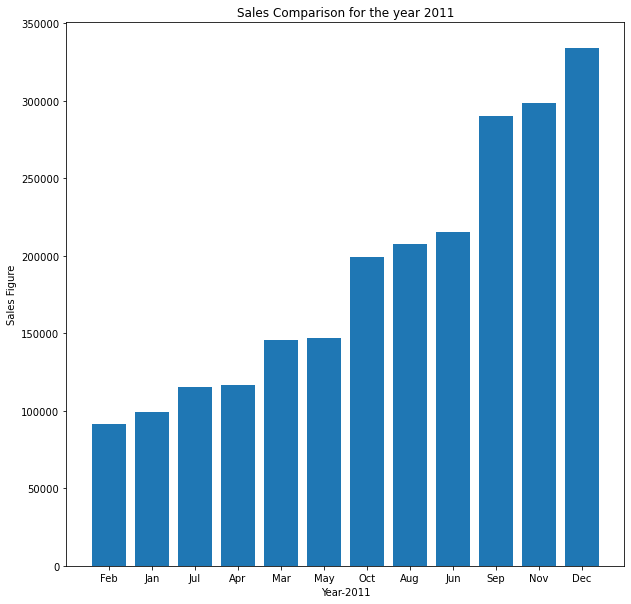

In [43]:
plt.figure(figsize=(10,10))
plt.bar(graph_data[graph_data.year==2011]['Month'],graph_data[graph_data.year==2011]['sales'])
plt.xlabel('Year-2011')
plt.ylabel('Sales Figure')
plt.title('Sales Comparison for the year 2011')
plt.plot()

In [44]:
total_monthly_Sales=sales2.groupby('Month').sum().sort_values(by=['Year']).reset_index()
total_monthly_Sales

,Month,Year
0,Feb,2224154
1,Jan,2558281
2,Apr,3037285
3,Mar,3133880
4,Jul,3148048
5,May,3828390
6,Oct,4613305
7,Aug,5058101
8,Jun,5376113
9,Sep,6098713


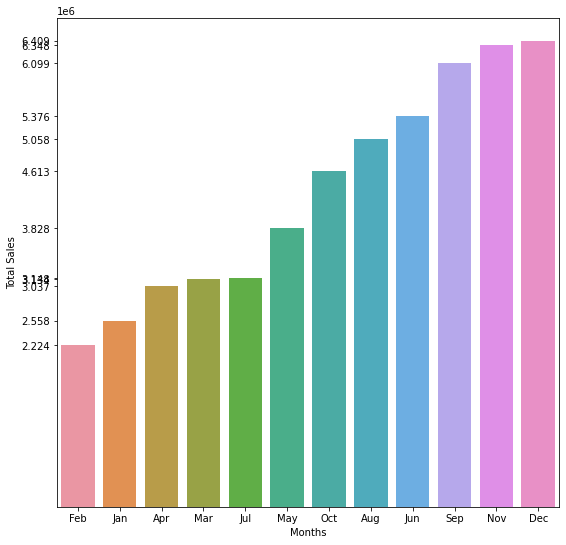

In [45]:
plt.figure(figsize=(9,9))
sns.barplot(x='Month',y='Year',data=total_monthly_Sales)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.yticks(total_monthly_Sales['Year'])
plt.show()

In [46]:
sales[sales['Month']=='Dec']['country'].value_counts()

United States    1421
France            419
Mexico            337
Australia         297
China             230
                 ... 
Gabon               1
Moldova             1
Sri Lanka           1
Libya               1
Finland             1
Name: country, Length: 127, dtype: int64

In [47]:
christmas_sales=sales[sales['Month']=='Dec'].groupby(['country']).sum().sort_values(by=['sales'],ascending=False).reset_index()
christmas_sales.head()

,country,sales,quantity,discount,profit,shipping_cost,year
0,United States,332177.15950,5469,212.810,43436.13390,36689.720,2860078
1,France,122254.08750,1594,31.600,12103.02750,13080.290,843405
2,Australia,101231.52000,1110,45.900,10957.05000,11082.190,597783
3,Mexico,84549.99324,1332,23.636,10908.33324,9458.686,678265
4,Germany,65996.52300,813,11.800,11959.89300,5959.830,436757


[]

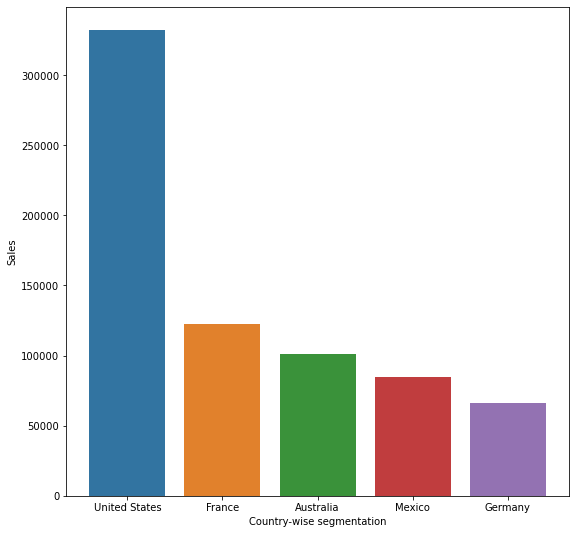

In [48]:
plt.figure(figsize=(9,9))
sns.barplot(x='country', y='sales',data=christmas_sales.head())
plt.xlabel('Country-wise segmentation')
plt.ylabel('Sales')
plt.plot()

In [49]:
sales['segment'].unique()
sales['segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64

In [50]:
consumer=sales[sales['segment']=='Consumer']
consumer['country'].value_counts().head()

United States    5191
Australia        1513
France           1455
Mexico           1378
Germany          1104
Name: country, dtype: int64

In [51]:
corporate=sales[sales['segment']=='Corporate']
corporate['country'].value_counts().head()

United States    3020
France            884
Australia         847
Mexico            816
Germany           603
Name: country, dtype: int64

In [52]:
ho=sales[sales['segment']=='Home Office']
ho['country'].value_counts().head()

United States    1783
France            488
Australia         477
Mexico            450
China             367
Name: country, dtype: int64

In [53]:
sales['country'].value_counts().head()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
Name: country, dtype: int64

In [54]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,New_product,Product,Month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,408.300,2,0.0,106.140,35.46,Medium,2011,Blue,Tenex Lockers,Jan
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,120.366,3,0.1,36.036,9.72,Medium,2011,High Speed,Acme Trimmer,Jan
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,66.120,4,0.0,29.640,8.17,High,2011,Single Width,Tenex Box,Jan
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,44.865,3,0.5,-26.055,4.82,High,2011,Premium,Enermax Note Cards,Jan
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,113.670,5,0.1,37.770,4.70,Medium,2011,Duo Pack,Eldon Light Bulb,Jan


In [55]:
sales=pd.read_excel('superstore_sales.xlsx')
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [56]:
sales.columns
sales.sub_category.value_counts().reset_index()

,index,sub_category
0,Binders,6152
1,Storage,5059
2,Art,4883
3,Paper,3538
4,Chairs,3434
5,Phones,3357
6,Furnishings,3170
7,Accessories,3075
8,Labels,2606
9,Envelopes,2435


In [57]:
for i in sales.sub_category.unique():
    print(i)
    print(sales[sales['sub_category']==i]['country'].value_counts().head())

Storage
United States     846
France            340
Germany           278
United Kingdom    227
Mexico            202
Name: country, dtype: int64
Supplies
Australia        191
United States    190
Mexico           152
France           129
China            122
Name: country, dtype: int64
Paper
United States    1370
Australia         190
Mexico            141
China             123
France            119
Name: country, dtype: int64
Furnishings
United States    957
Mexico           172
Australia        150
France           109
China            105
Name: country, dtype: int64
Machines
France            137
United States     115
Australia          85
United Kingdom     79
Germany            78
Name: country, dtype: int64
Appliances
United States    466
France            99
Australia         91
Mexico            78
Germany           56
Name: country, dtype: int64
Copiers
Australia    179
Mexico       165
France       132
China        121
Brazil       111
Name: country, dtype: int64
Chairs
Unit

In [58]:
sales['sub_category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: sub_category, dtype: int64

In [59]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [62]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,Jan
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,Jan
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,Jan
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,Jan
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,Jan


In [73]:
sales['Month-Year']=sales['order_date'].dt.strftime('%m-%Y')

In [74]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Month,Month-Year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,Jan,01-2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,Jan,01-2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,Jan,01-2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,Jan,01-2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,Jan,01-2011


C:\Users\Subramaniam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

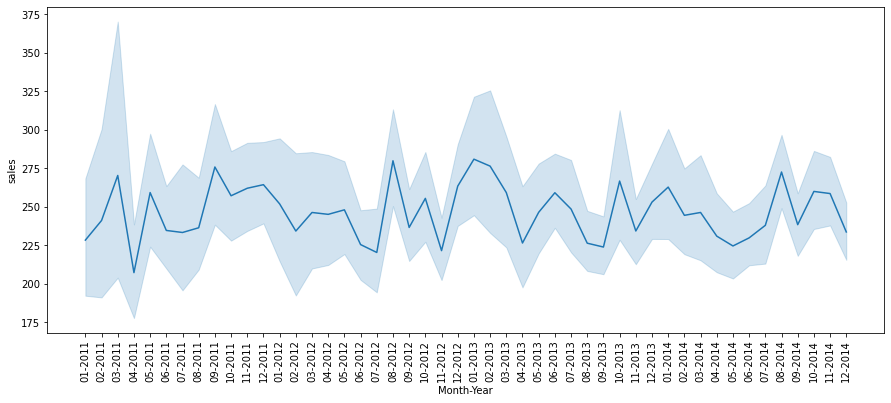

In [86]:
plt.figure(figsize=(15,6))
sns.lineplot(sales['Month-Year'],sales['sales'])
plt.xticks(rotation=90)
plt.plot()

#### TOP 10 PRODUCTS BY SALE

In [89]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Month,Month-Year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,Jan,01-2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,Jan,01-2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,Jan,01-2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,Jan,01-2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,Jan,01-2011


In [126]:
pd.DataFrame(sales.groupby('product_name').sum().sort_values(by=['sales'],ascending=False).head(10)['sales'])

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


#### MOST SELLING PRODUCTS

In [127]:
sales.columns
pd.DataFrame(sales.groupby('product_name').sum().sort_values(by=['quantity'],ascending=False)['quantity']).head(10)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


#### MOST PREFFERED SHIP MODE

In [130]:
sales.head()
sales.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'Month', 'Month-Year'],
      dtype='object')

In [135]:
sales.ship_mode.value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

C:\Users\Subramaniam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

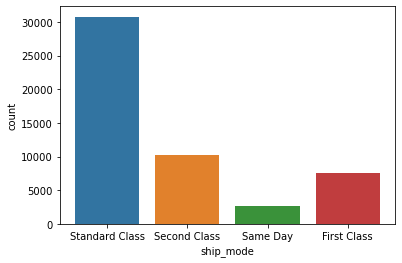

In [139]:
sns.countplot(sales['ship_mode'])
plt.plot()

#### MOST PROFITABLE CATEGORY AND SUB-CATEGORY

In [142]:
sales.head()
sales.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'Month', 'Month-Year'],
      dtype='object')

In [155]:
pd.DataFrame(sales.groupby(['category','sub_category']).sum()['profit']).sort_values(by=['category','profit'],ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870